Following a recent [Lindy Hop](https://www.youtube.com/watch?v=tCc6ft3xmPs) class, I'm now interesting in bouncing off the ground with my feet.

But what is bouncing? How does it work? And, most importantly, what are its equations? Follow me into the world of elastic collisions.

# The mathematics of bouncing: a falling ball

I'd like to formulate the bouncing problem in terms of a simple analogy: the movement of a ball that falls on the ground and bounces off from it.

We consider our ball to have a mass $m$, a (two-dimensional) position vector $\vec{x}$, speed $\vec{v} = \vec{\dot{x}}$. Let's suppose the ball is on earth and gravity applies. We can thus write:

$$m \frac{d \vec{v}}{dt} = m \vec{g}$$

Gravity is constant and thus we can integrate twice to get the following formula:

$$
\vec{x} = \frac{1}{2}\vec{g}t^2 + \vec{v_0}t + \vec{x_0}
$$

This is already interesting, as this equation describes the trajectory of a cannon ball when friction is negligible, or a thrown rock, a basketball and numerous other things. Let's implement this.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
def plot_trajectory(x_0, v_0, t_min, t_max):
    t = np.linspace(t_min, t_max)
    x = 1/2. * 9.81 * np.array([0, -1.])[:, np.newaxis] * t**2 + v_0[:, np.newaxis] * t + x_0[:, np.newaxis]
    plt.plot(x[0, :], x[1, :], '-o')
    plt.plot(x[0, 0], x[1, 0], 'or', ms=15)
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.title('trajectory over duration $\Delta t = {}$ seconds'.format(t_max - t_min))

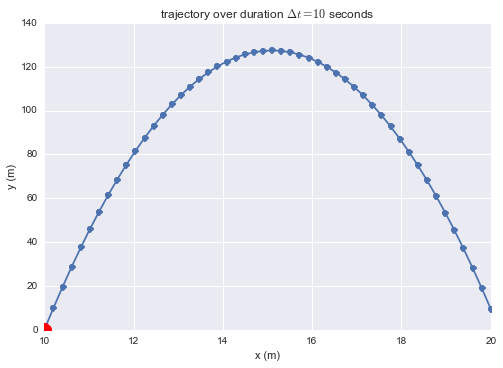

In [3]:
plot_trajectory(x_0=np.array([10, 0]),
                v_0=np.array([1, 50]),
                t_min=0, 
                t_max=10)

This seems to work, let's see what happens if we make it interactive.

In [4]:
from IPython.html.widgets import interact

:0: FutureWarning: IPython widgets are experimental and may change in the future.


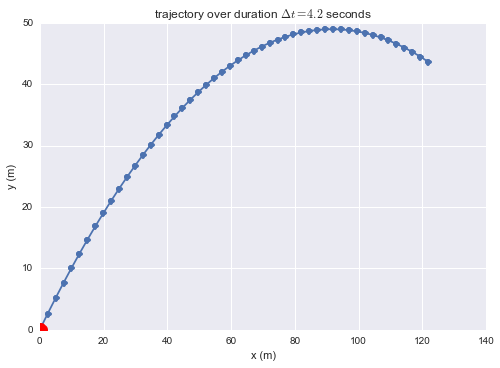

In [5]:
interact(lambda v_0x, v_0y, t_max: plot_trajectory(np.array([0., 0.]), np.array([v_0x, v_0y]), 0, t_max),
         v_0x=(-50, 50), 
         v_0y=(-50, 50), 
         t_max=(0, 20, 0.1))

We can produce a simple animation from the previous code.


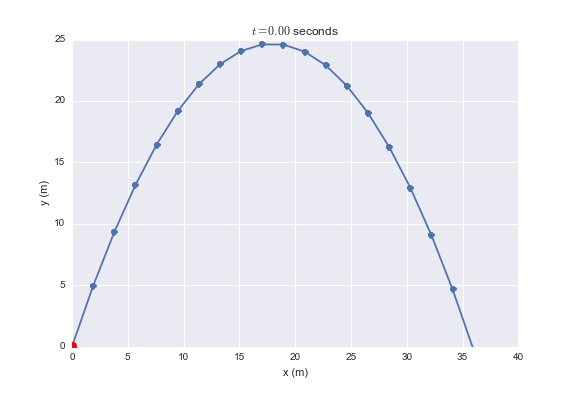
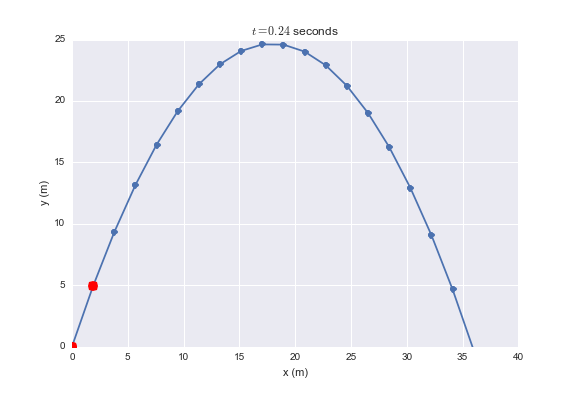
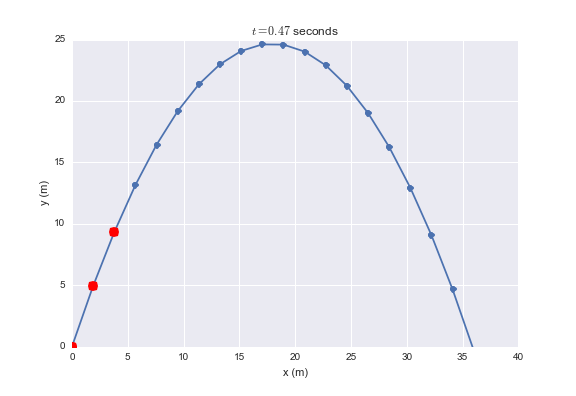
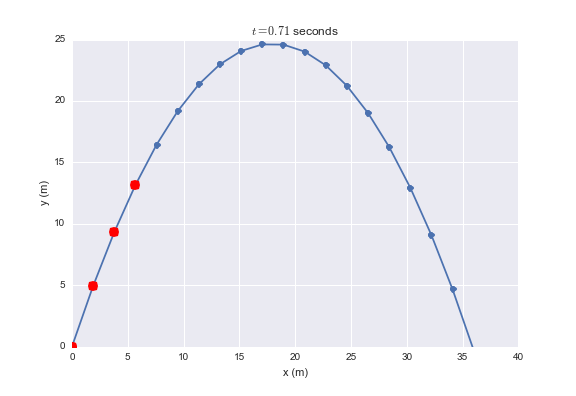
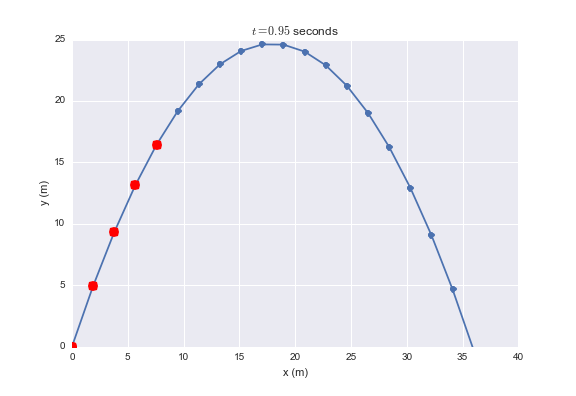
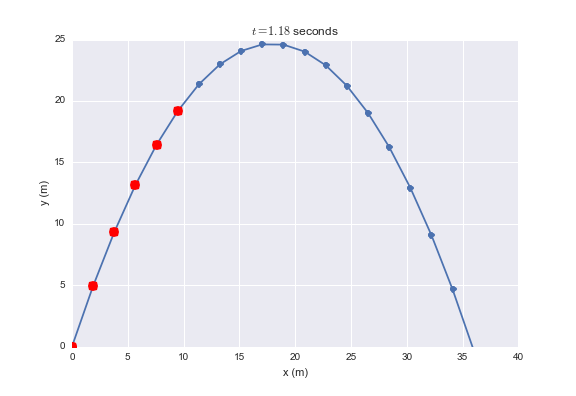
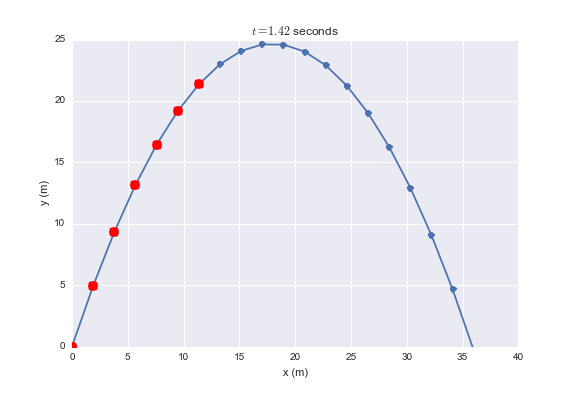
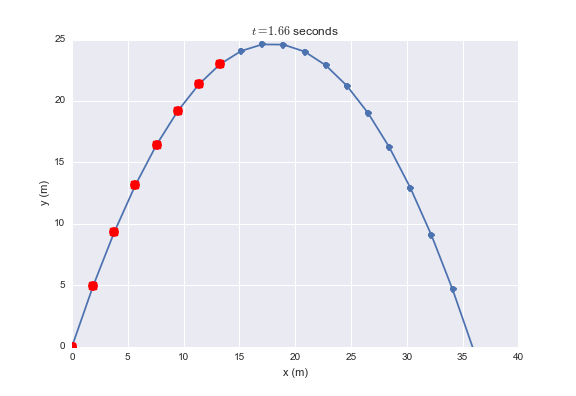
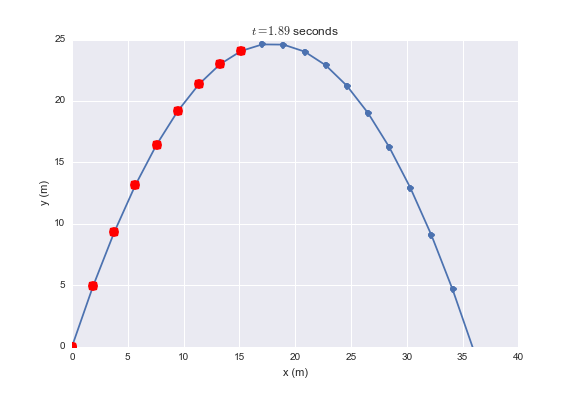
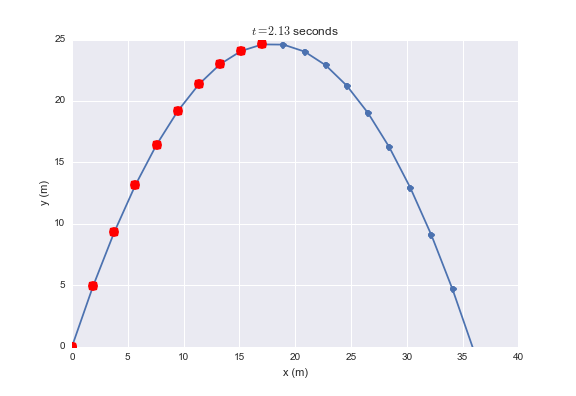
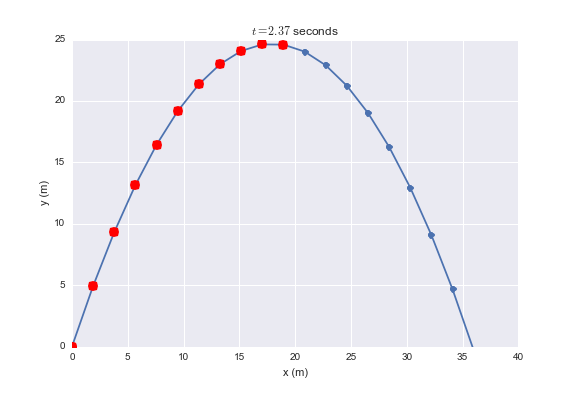
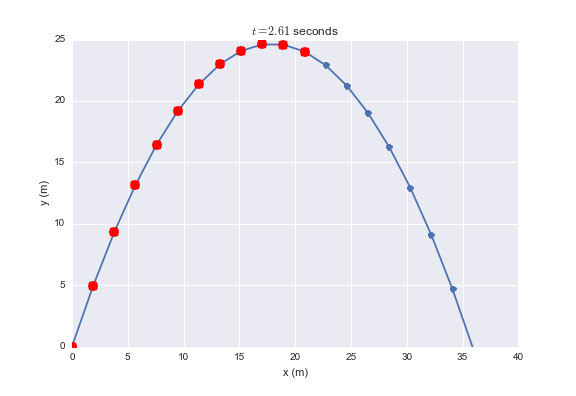
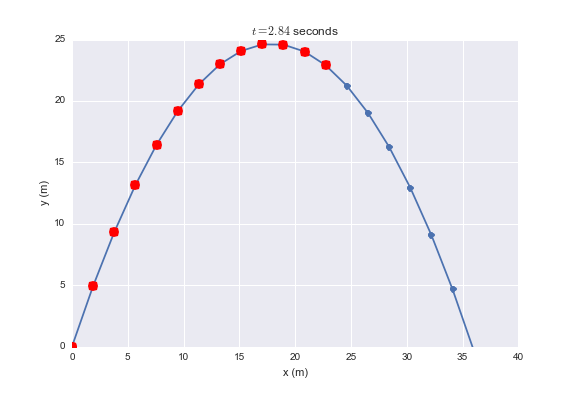
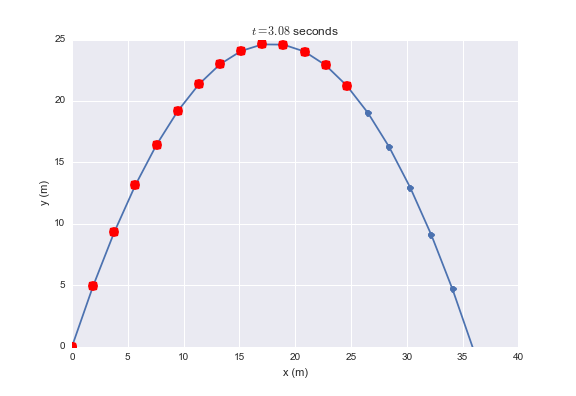
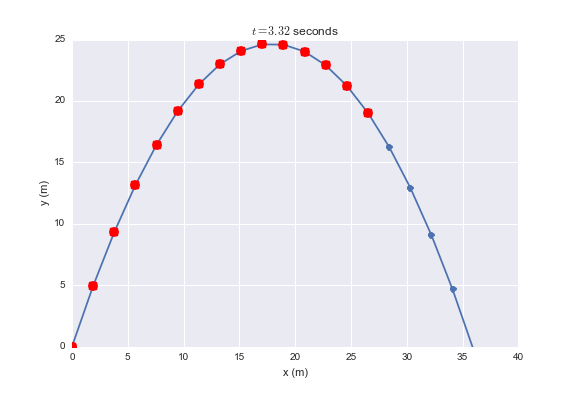
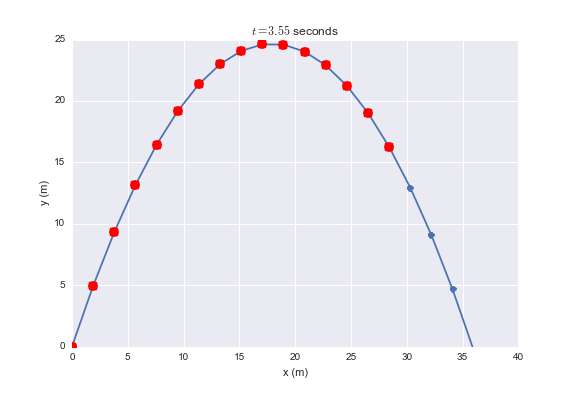
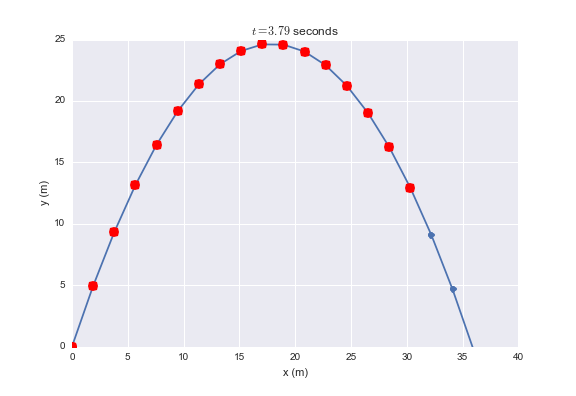
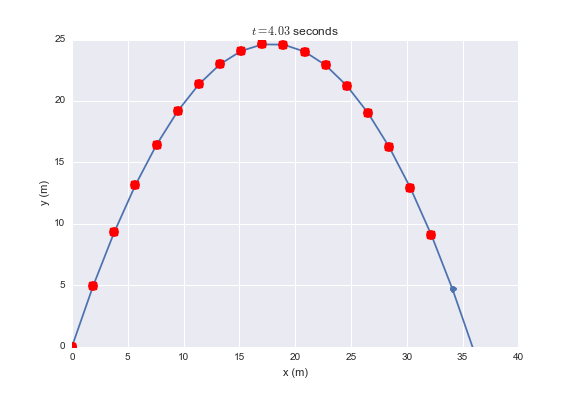
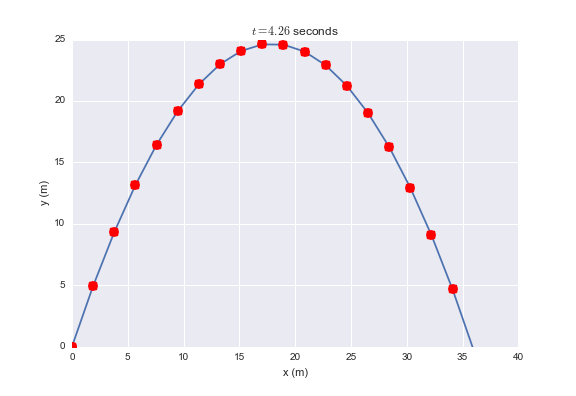
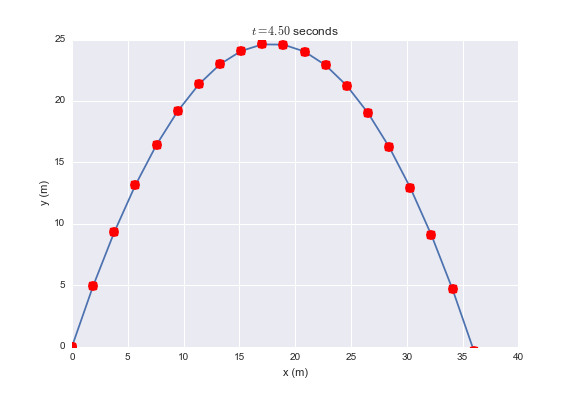

In [6]:
from JSAnimation import IPython_display
from matplotlib import animation

frames = 20
fig = plt.figure()
ax = plt.axes(xlim=(-4, 4), ylim=(-4, 4))
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
t = np.linspace(0, 4.5, num=frames)
v_0 = np.array([8, 22])
x_0 = np.zeros((2,))
x = 1/2. * 9.81 * np.array([0, -1.])[:, np.newaxis] * t**2 + v_0[:, np.newaxis] * t + x_0[:, np.newaxis]    
ax.set_xlim(0, 40)
ax.set_ylim(0, 25)

def init():
    ax.plot(x[0, :], x[1, :], '-o')
    ax.plot(x[0, 0], x[1, 0], 'or', ms=10)

def animate(i):
    ax.plot(x[0, i], x[1, i], 'or', ms=10)
    ax.set_title("$t = {:.2f}$ seconds".format(t[i]))
    return 

animation.FuncAnimation(fig, animate, init_func=init,
                        frames=frames, interval=200, blit=True)

As you can notice in the previous animation, the ball comes to a stop when reaching the highest altitude. This is typical for a gravity-based ball throw.

# Adding an elastic collision to create a bouncing effect 

Now that we are done with throwing balls, we can work in the collision part. 

The basic equations can be found on [Wikipedia](https://en.wikipedia.org/wiki/Elastic_collision). They follow from the conservation of momentum as well as from the conservation of energy. 

We will implement the vector form of the formula describing the change in velocity for two moving objects:
$$
\begin{align}
\mathbf{v}'_1&=\mathbf{v}_1-\frac{2 m_2}{m_1+m_2} \ \frac{\langle \mathbf{v}_1-\mathbf{v}_2,\,\mathbf{x}_1-\mathbf{x}_2\rangle}{\|\mathbf{x}_1-\mathbf{x}_2\|^2} \ (\mathbf{x}_1-\mathbf{x}_2),
\\
\mathbf{v}'_2&=\mathbf{v}_2-\frac{2 m_1}{m_1+m_2} \ \frac{\langle \mathbf{v}_2-\mathbf{v}_1,\,\mathbf{x}_2-\mathbf{x}_1\rangle}{\|\mathbf{x}_2-\mathbf{x}_1\|^2} \ (\mathbf{x}_2-\mathbf{x}_1)
\end{align}
$$

In [7]:
def compute_velocity_after_collision(v1, m1, x1):
    """
    computes the new velocity of the ball, in vector form, after collision
    """
    m2 = 10 * m1
    v2 = np.zeros((2,))
    x2 = x1 - np.array([0, -0.1])
    
    v1_prime = v1 - 2 * m2 / (m1 + m2) * np.sum((v1 - v2) * (x1 - x2)) / np.linalg.norm(x1 - x2)**2 * (x1 - x2)
    return v1_prime

Let's see what the result of this formula is, using an interactive animation.

In [8]:
def plot_collision_outcome(v1x, v1y, m1):

    
    v1 = np.array([v1x, v1y])
    
    x1x = 0.
    x1y = 0.
    x1 = np.array([x1x, x1y])
    v1_prime = compute_velocity_after_collision(v1, m1, x1)
    ax = plt.gca()
    ax.arrow(x1x, x1y, v1x, v1y, head_width=0.05, head_length=0.1, fc='b', ec='b')
    ax.arrow(x1x, x1y, v1_prime[0], v1_prime[1], head_width=0.05, head_length=0.1, fc='k', ec='k')
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)

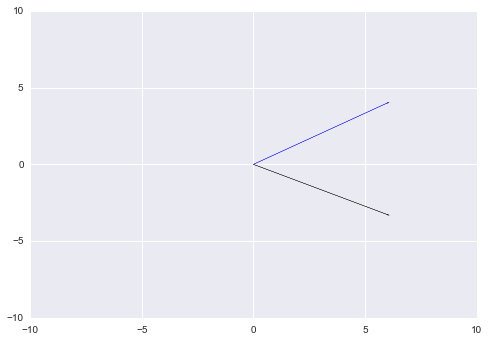

In [9]:
interact(plot_collision_outcome,
        v1x=(-10, 10),
        v1y=(-10, 10),
        m1=10)

Our formula seems to be working. So let's move on to the animation of the bouncing ball with an elastic collision!

We'll make use of the fact that we know exactly at which times the ball hits the ground, which we put at $y=0$. 
Indeed, we can determine that the bouncing time satisfies the following equation:

$$
-1/2 g t^2 + v_{y0} t + x_{y0} = 0
$$


In [10]:
def compute_bounce_time(vy0, xy0):
    roots = np.roots(np.array([-0.5 * 9.81, vy0, xy0]))
    return roots[roots > 0]

We can use the example from the animation we drew in the first part of this post to check that our function is correct. In that animation, the bouncing time was around 4.5 seconds for an initial vertical velocity of 22 m/s and an initial vertical position of 0 meters.

In [11]:
compute_bounce_time(22, 0)

array([ 4.48521916])

This seems to work.

So now all that's left to do is do an animation using the functions we have put together. We'll specify the number of bounces we want to observe and animate the whole thing.

In [12]:
def plot_trajectory_with_bounce(x_0, v_0, number_of_bounces):
    x = np.zeros((2, 1))
    start_time = 0.
    total_time = 0.
    for i in range(number_of_bounces):
        bounce_time = compute_bounce_time(v_0[1], x_0[1])
        if bounce_time.size == 0:
            continue
        else:
            # we only keep the biggest bouncing time (in case there's a near zero one)
            bounce_time = np.max(bounce_time)
            
        t = np.linspace(start_time, bounce_time)
        x = np.hstack((x, 
                       1/2. * 9.81 * np.array([0, -1.])[:, np.newaxis] * t**2 + v_0[:, np.newaxis] * t + x_0[:, np.newaxis]))
        v1 = 9.81 * np.array([0, -1.])[:, np.newaxis] * t + v_0[:, np.newaxis] 
        v1_prime = compute_velocity_after_collision(v1[:, -1], 1.0, x[:, -1])
        v_0 = v1_prime
        x_0 = x[:, -1]
        total_time += bounce_time

    x = x[:, 1:]
    plt.plot(x[0, :], x[1, :], '-o')
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.title("total time: {:.2f} seconds".format(total_time))

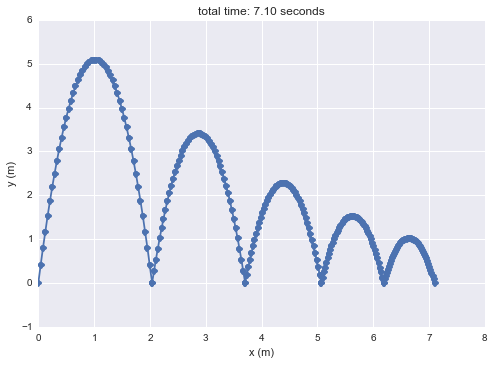

In [13]:
plot_trajectory_with_bounce(x_0=np.array([0, 0]),
                v_0=np.array([1, 10]),
                number_of_bounces=5)

Using the previous code, we can come up with an animation of a boucing ball:


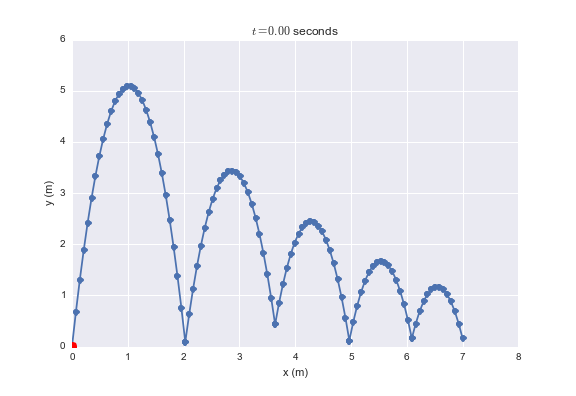
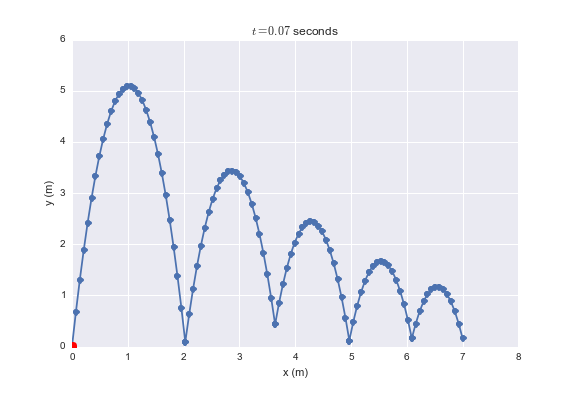
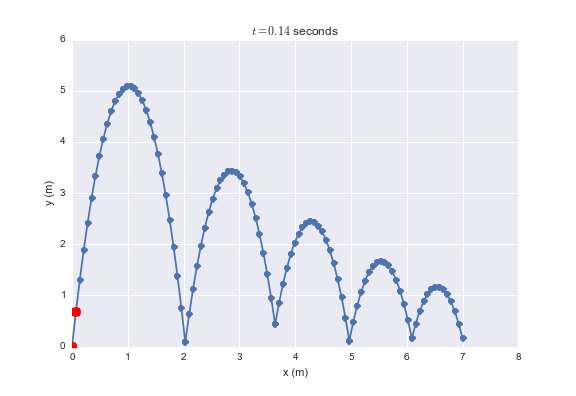
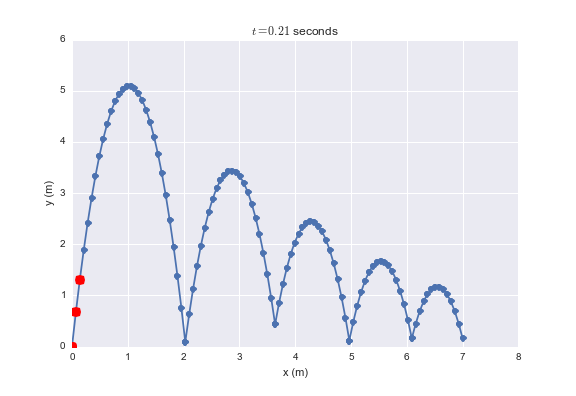
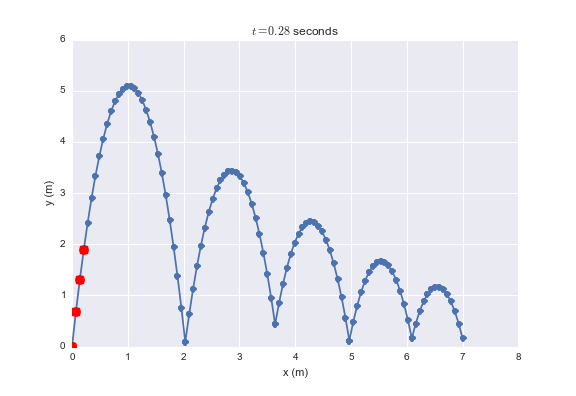
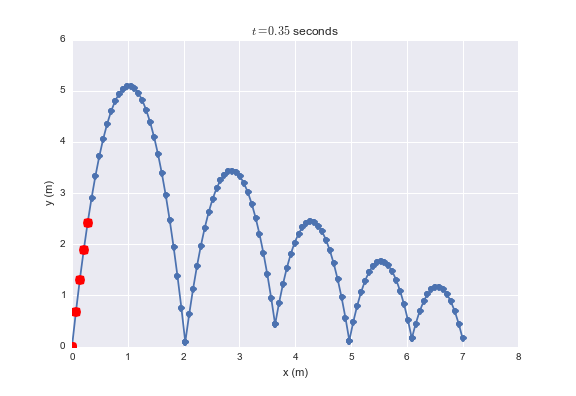
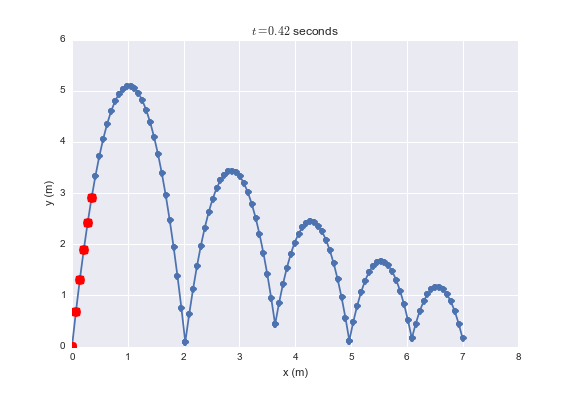
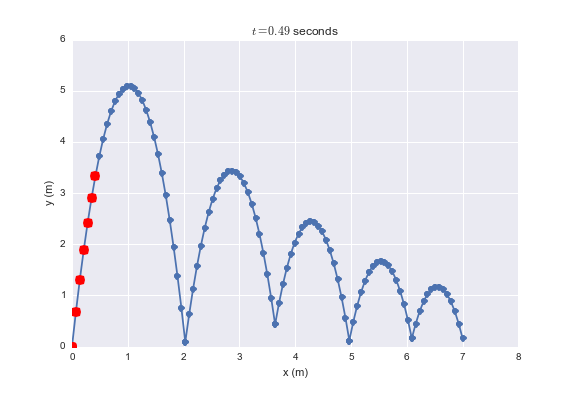
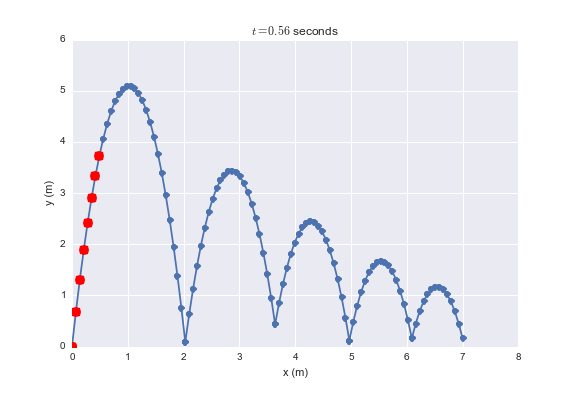
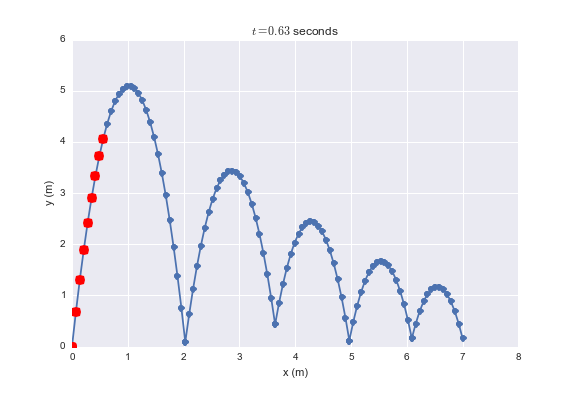
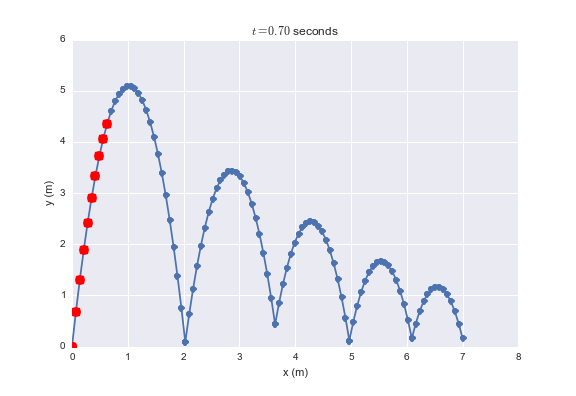
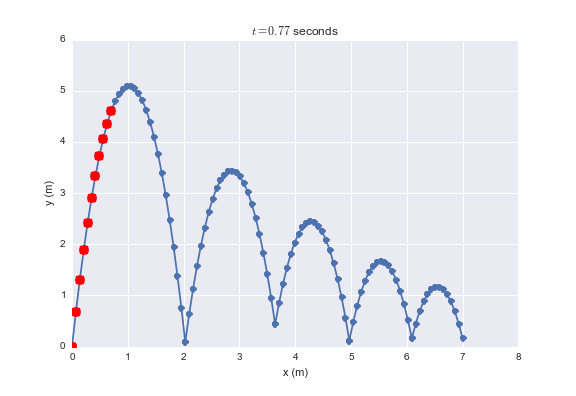
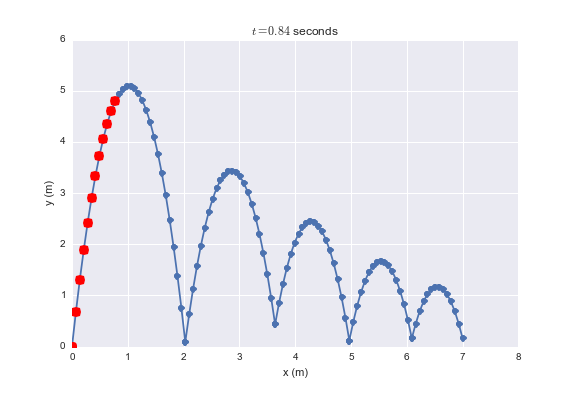
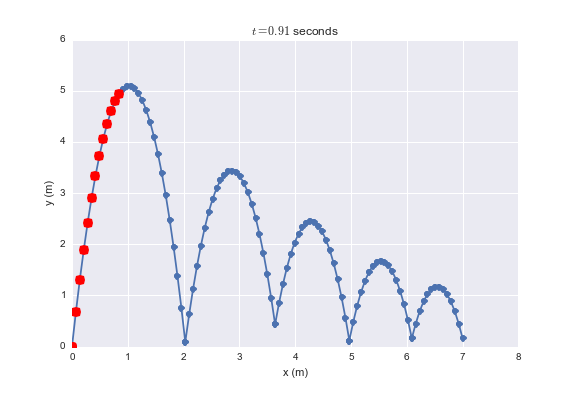
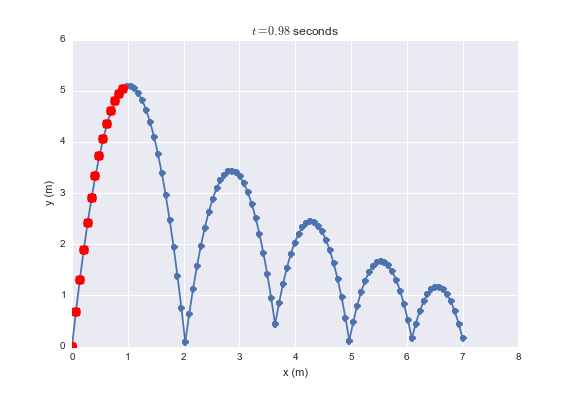
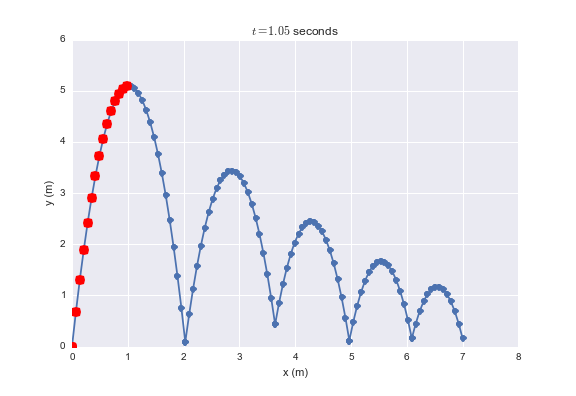
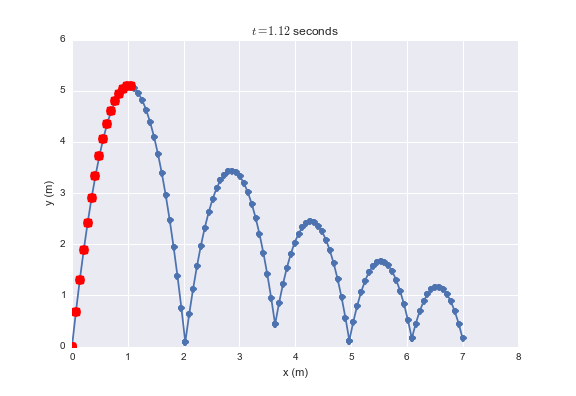
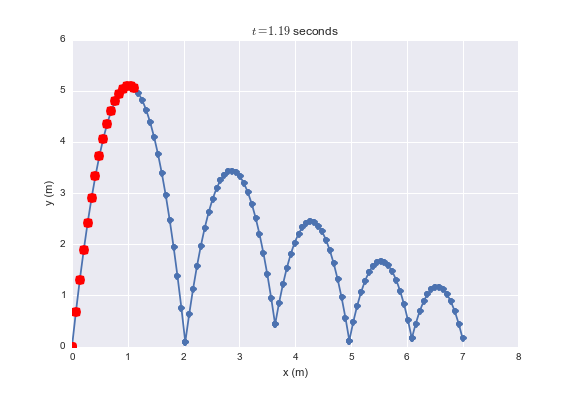
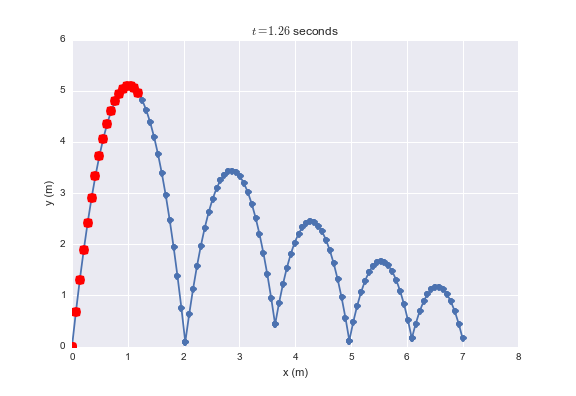
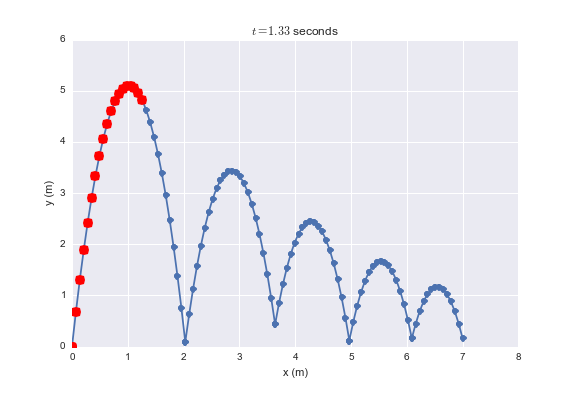
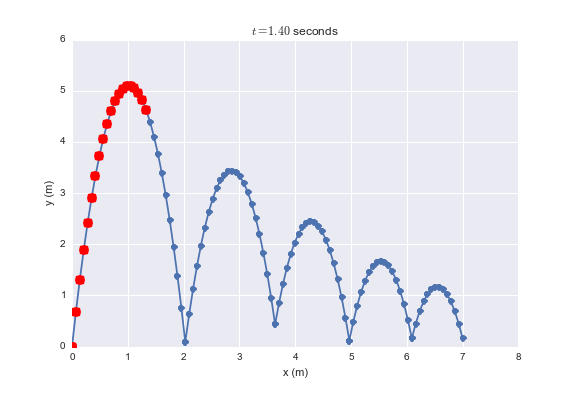
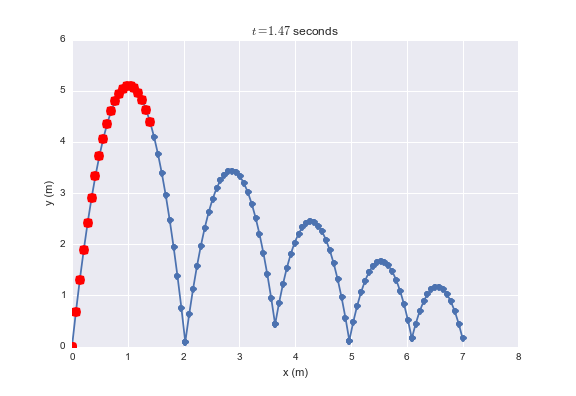
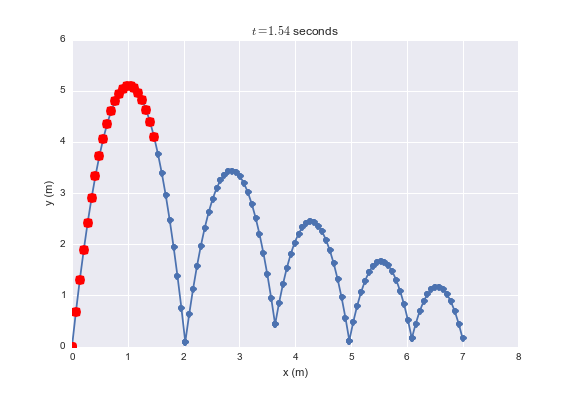
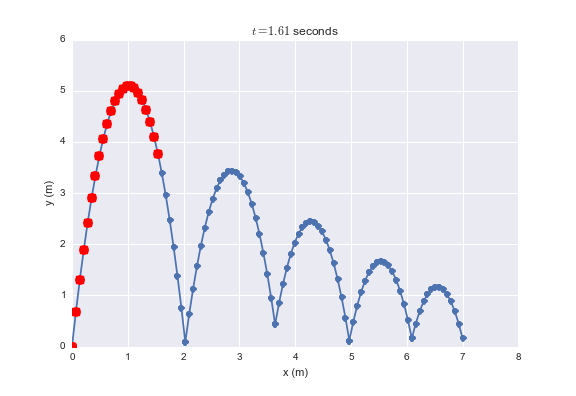
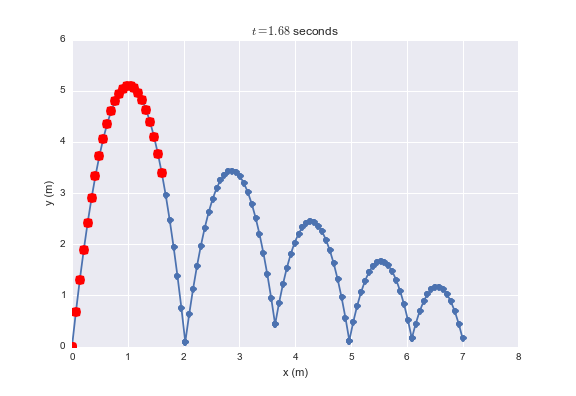
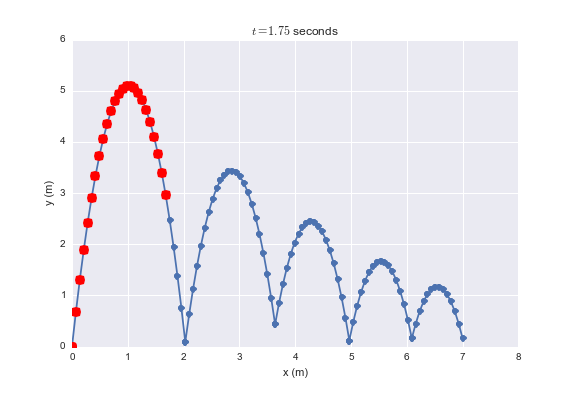
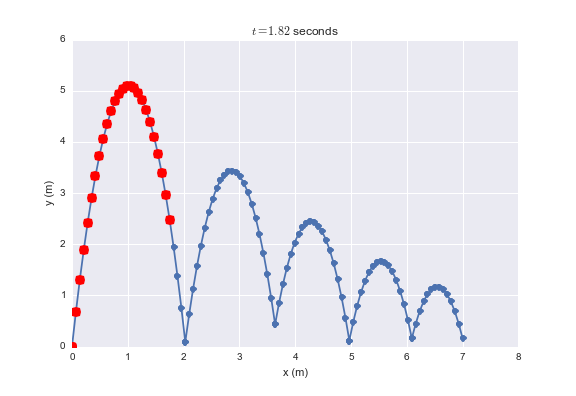
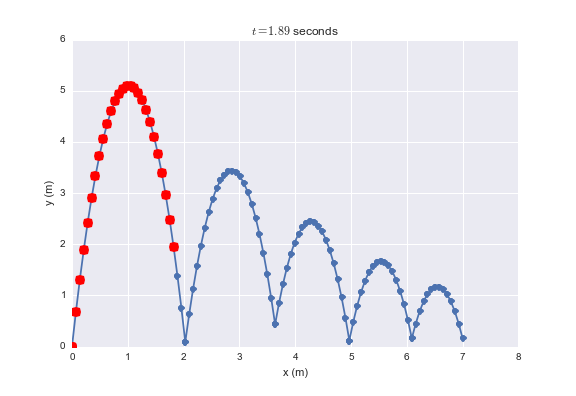
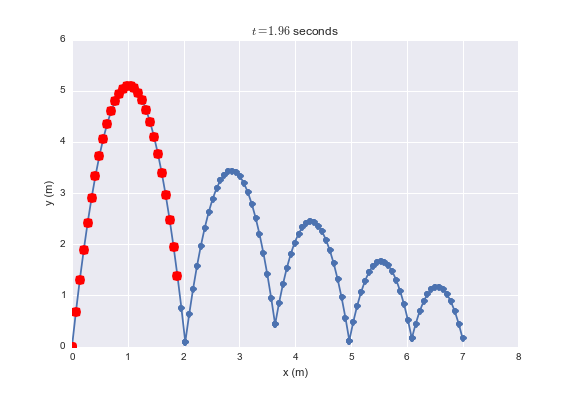
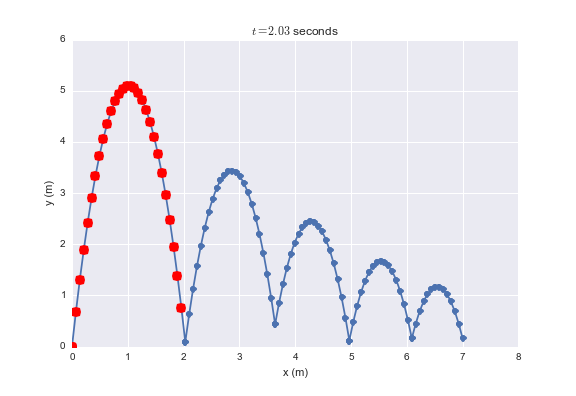
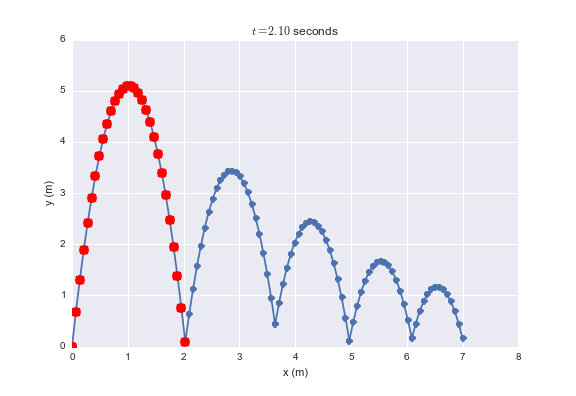
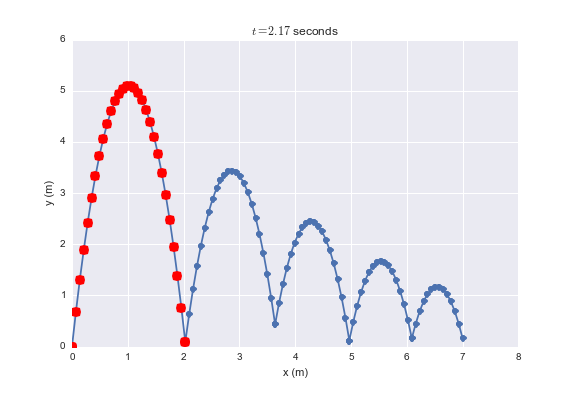
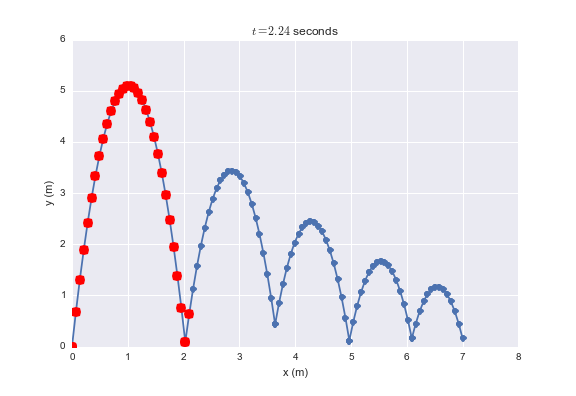
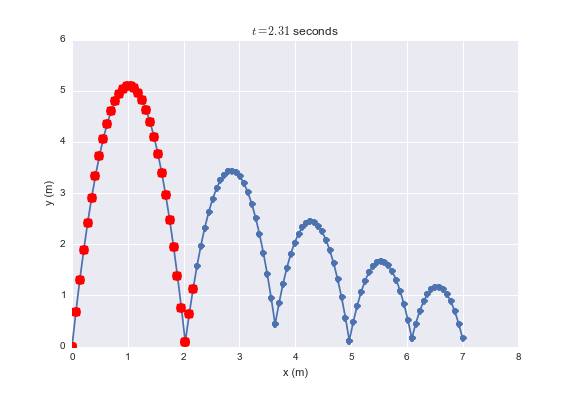
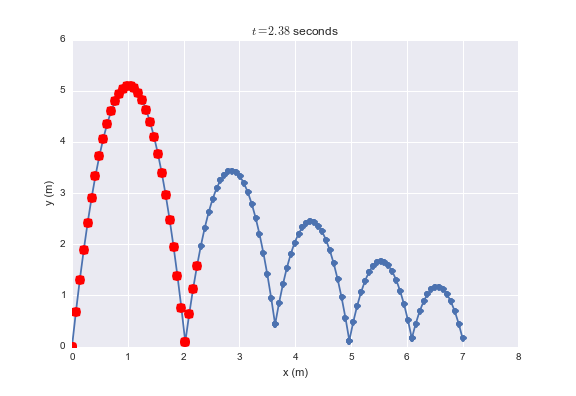
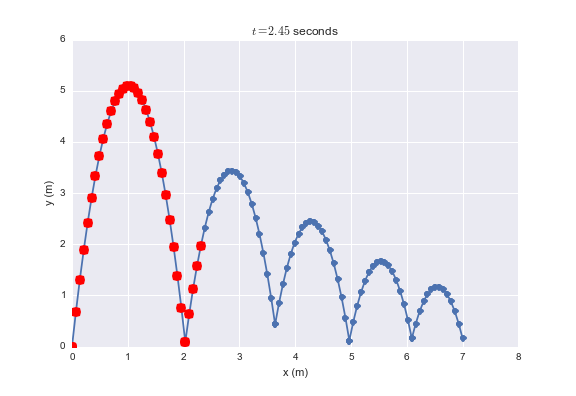
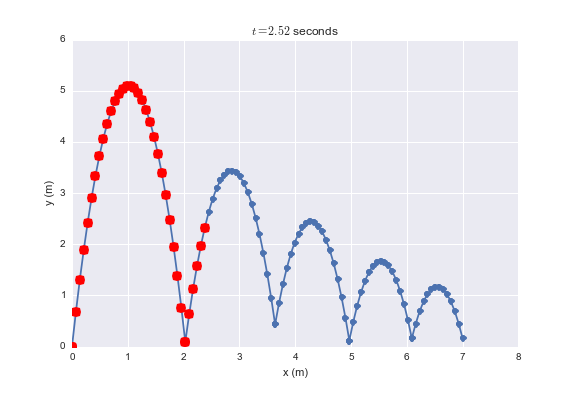
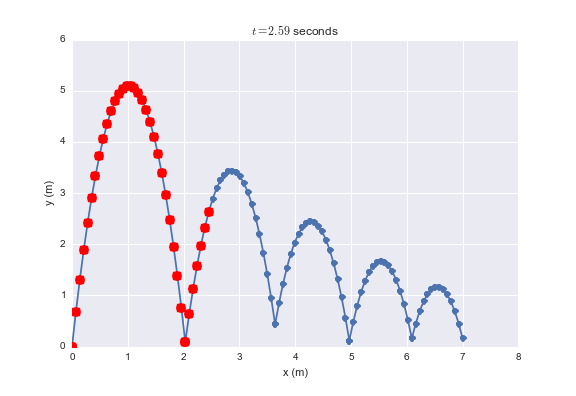
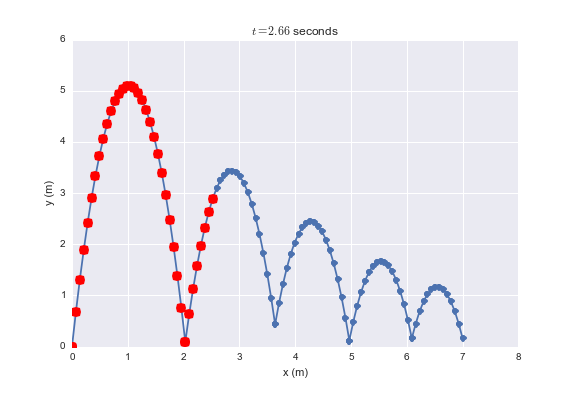
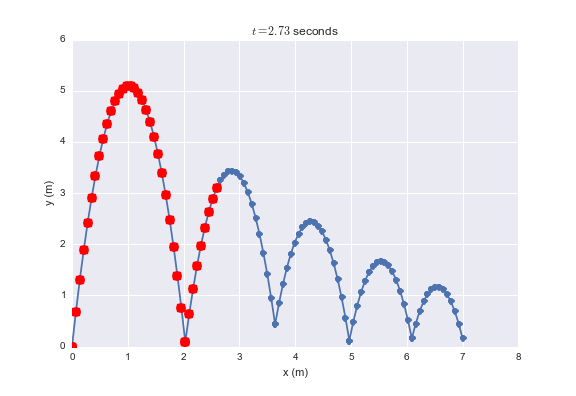
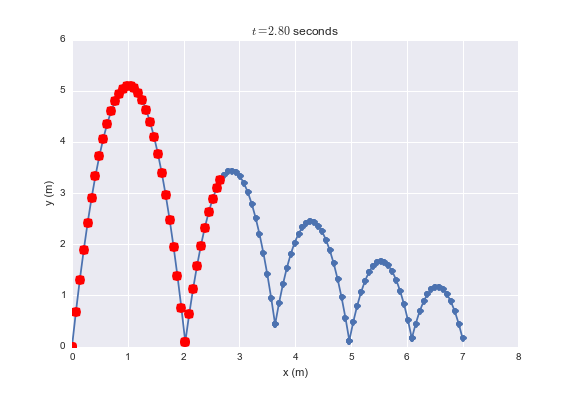
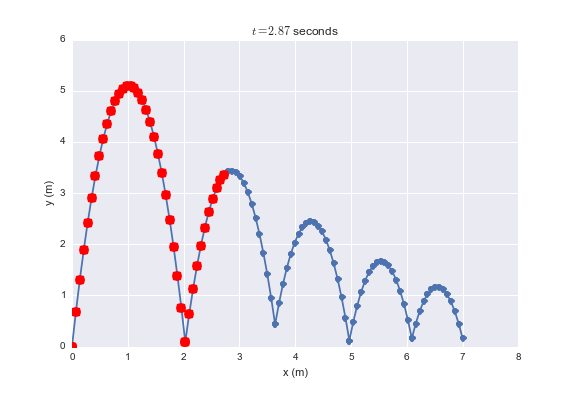
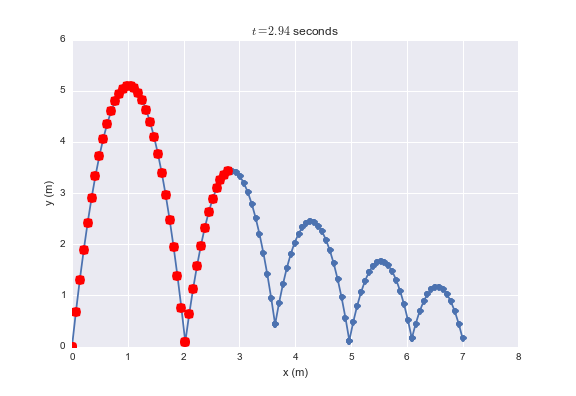
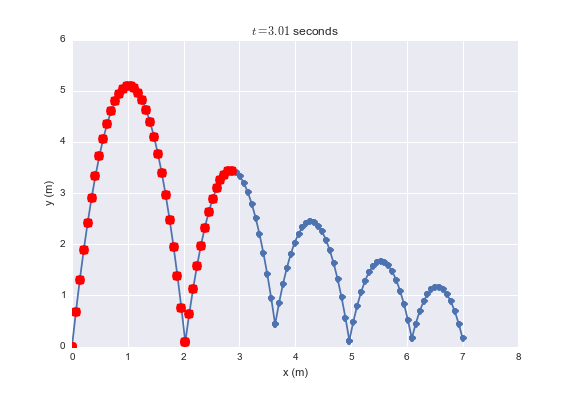
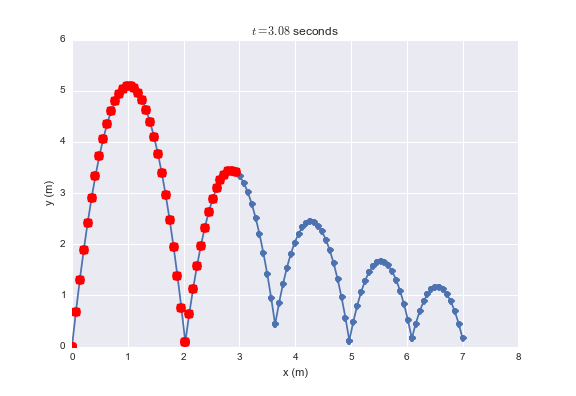
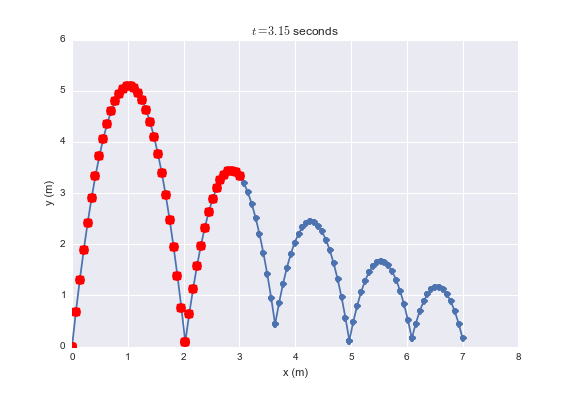
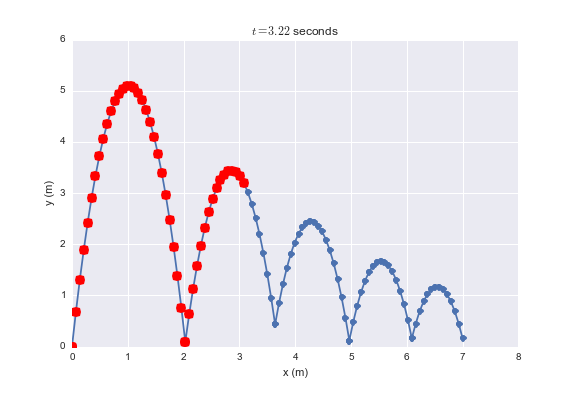
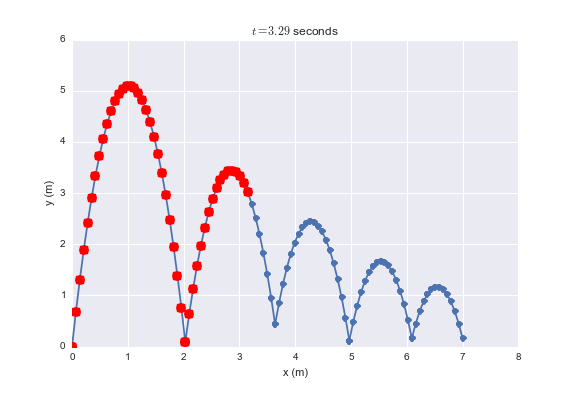
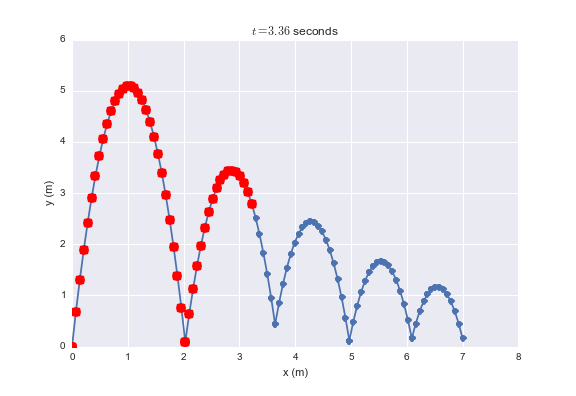
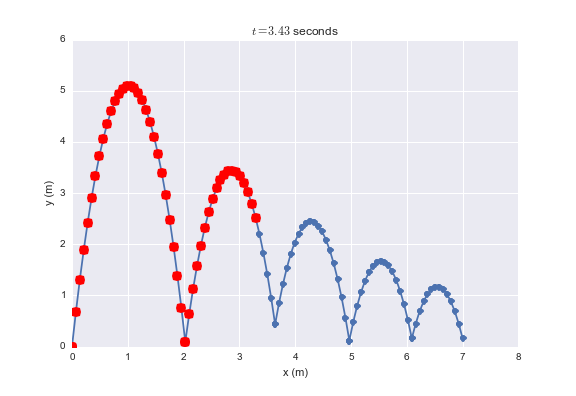
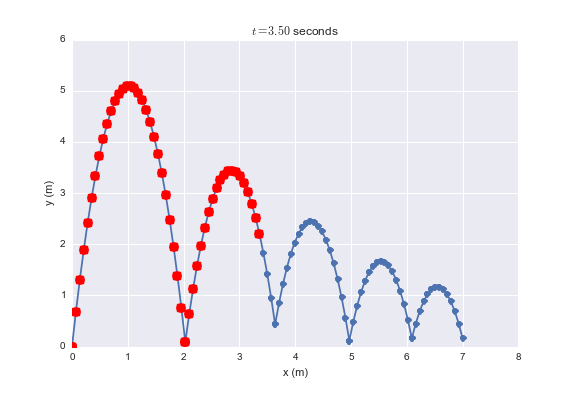
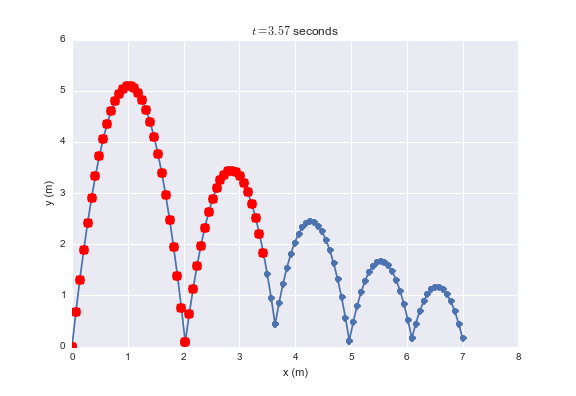
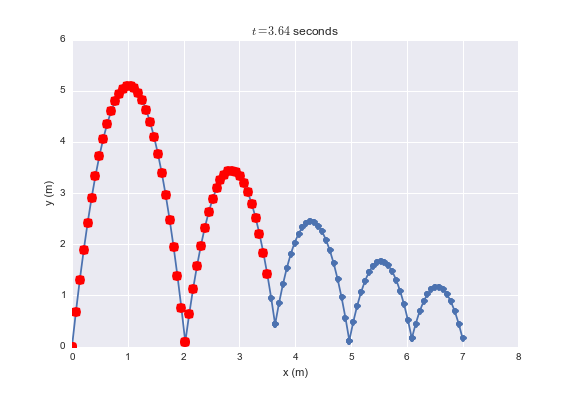
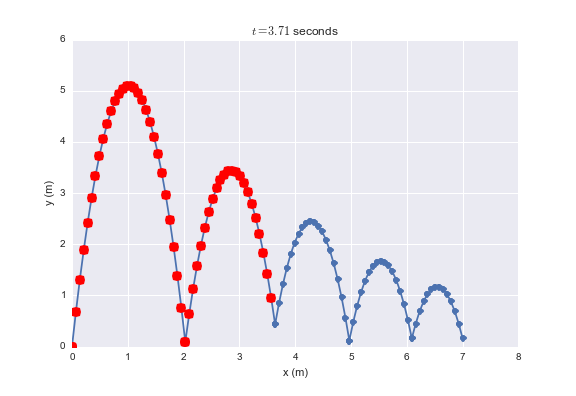
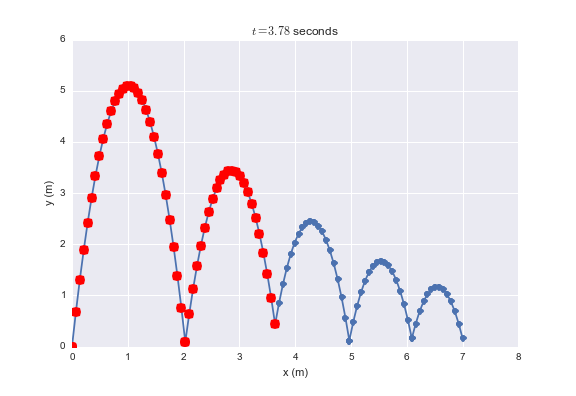
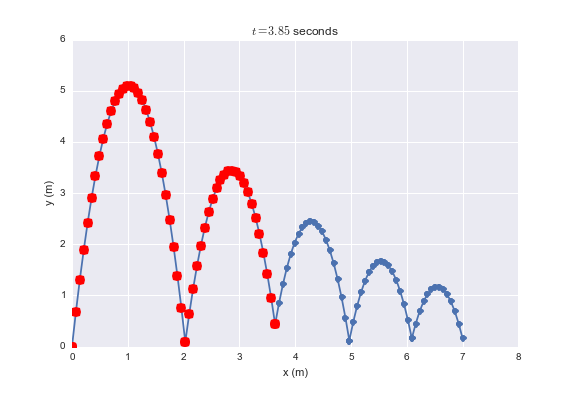
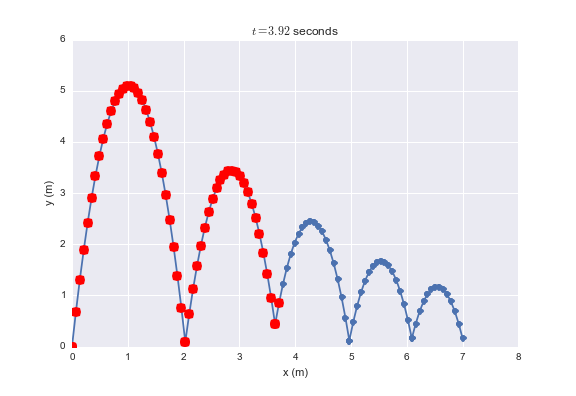
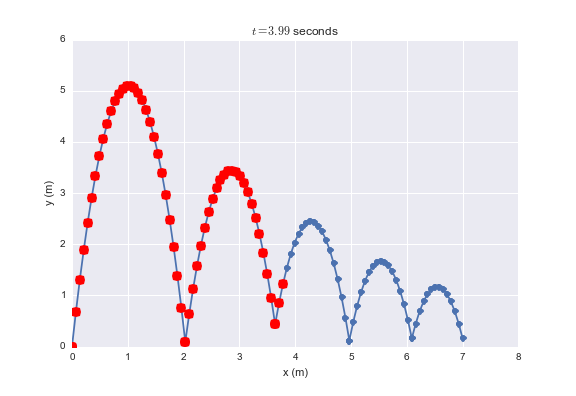
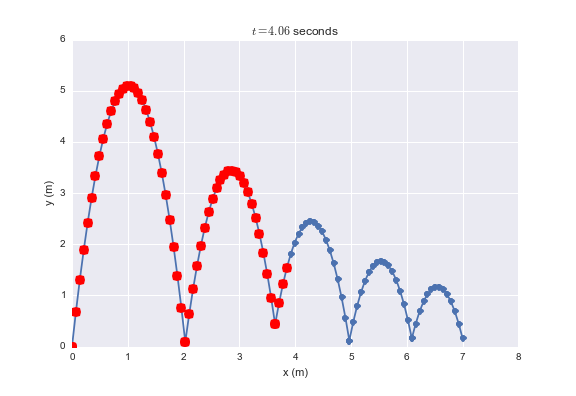
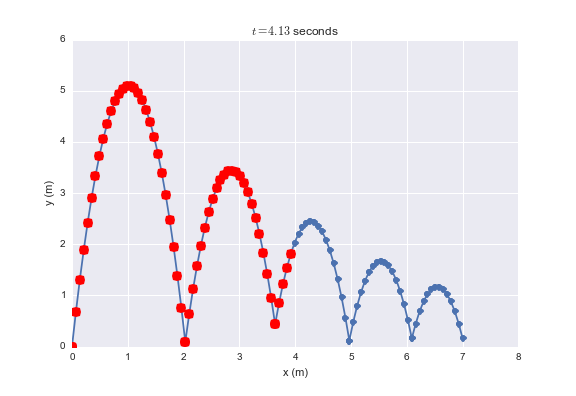
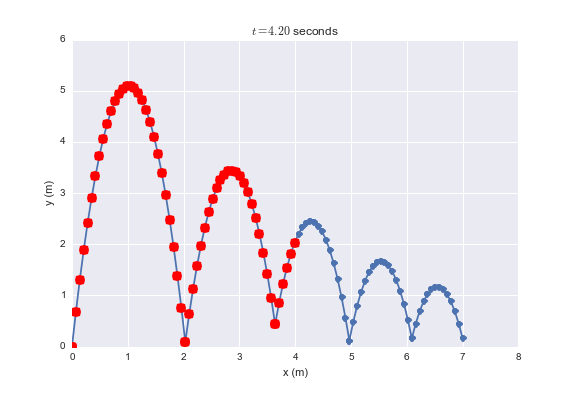
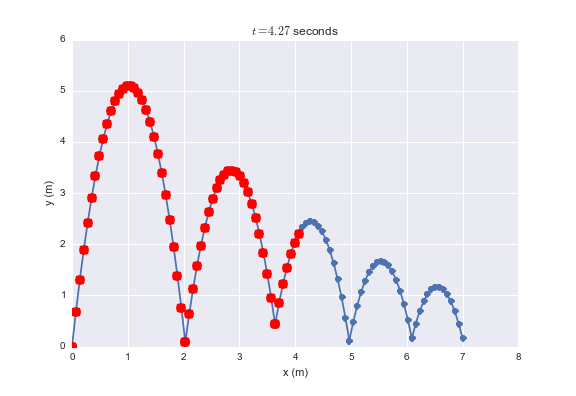
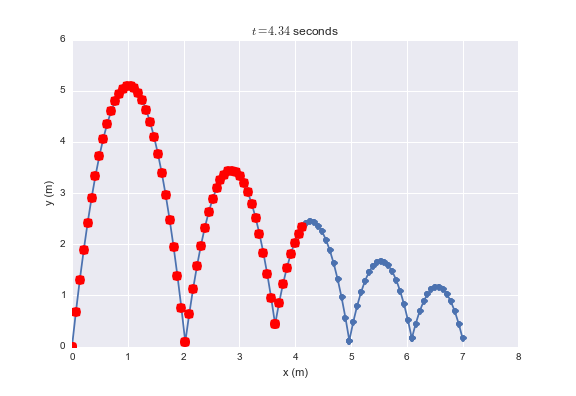
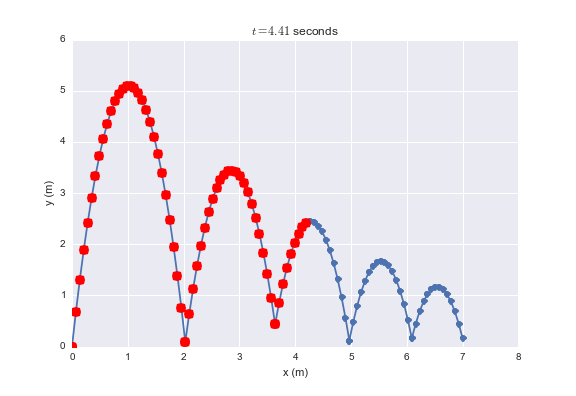
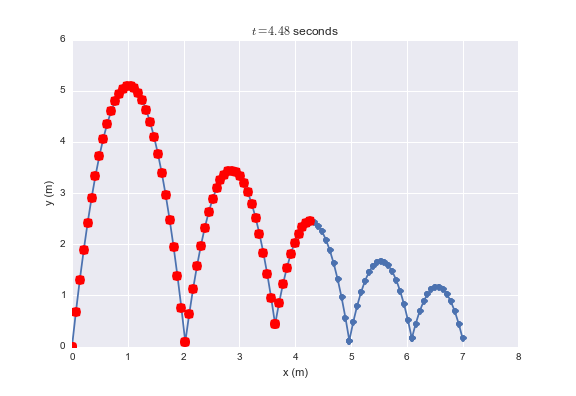
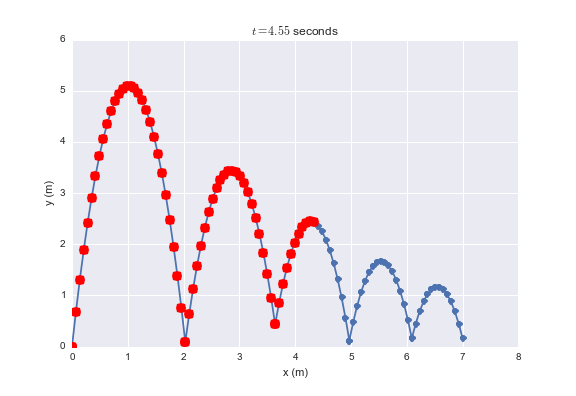
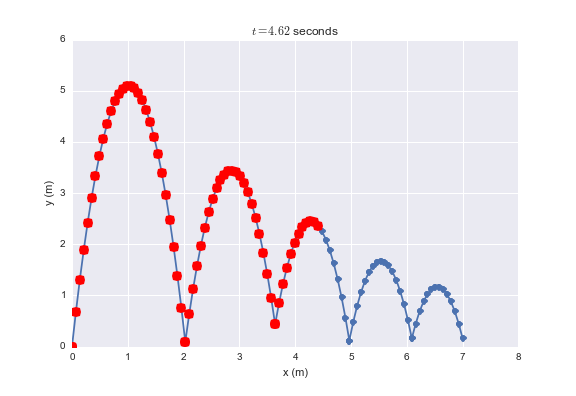
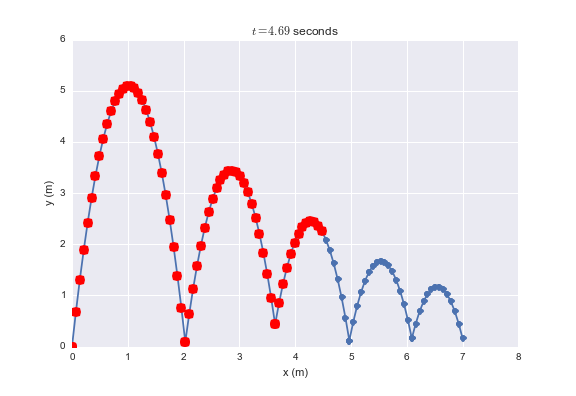
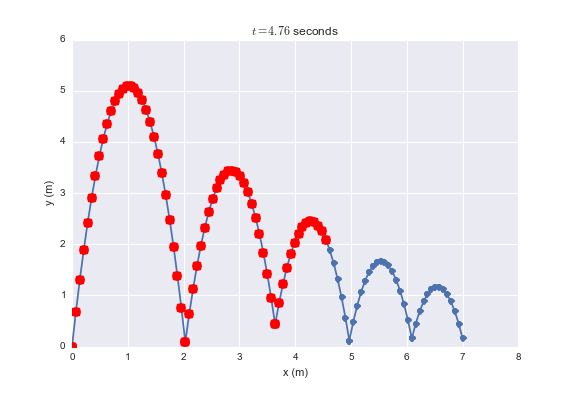
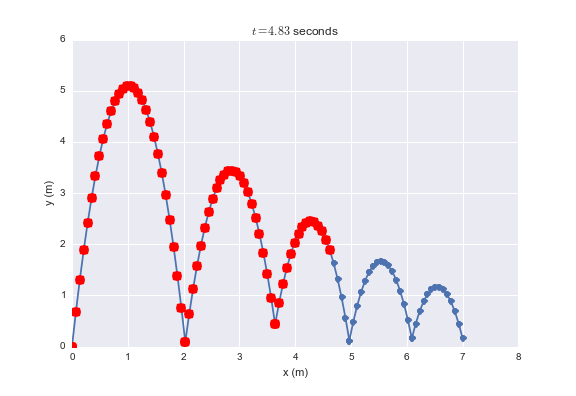
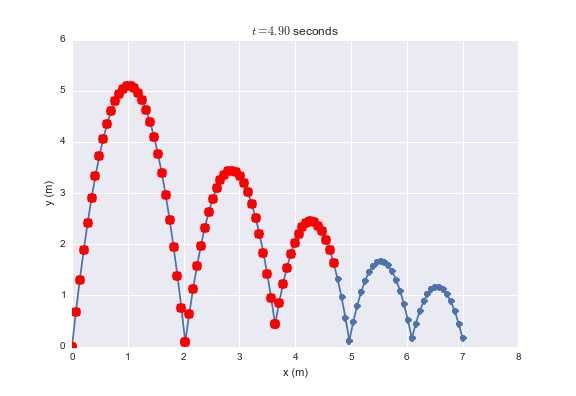
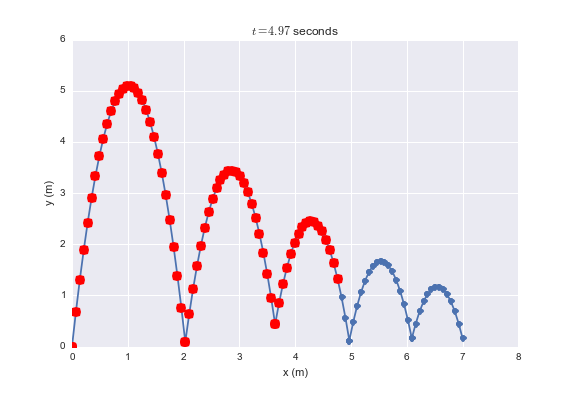
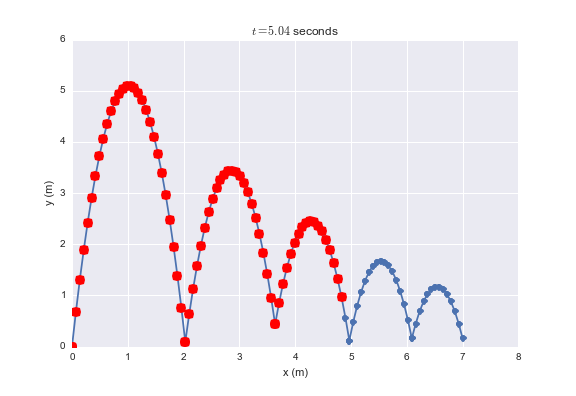
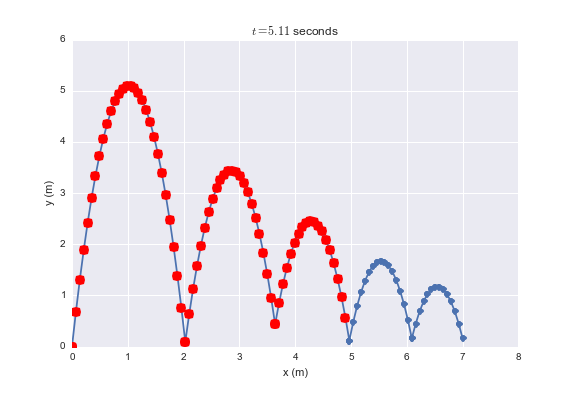
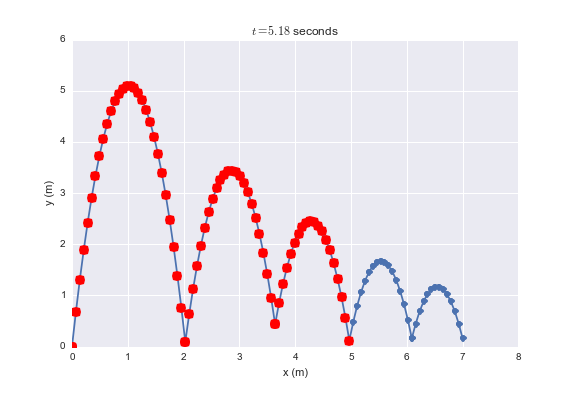
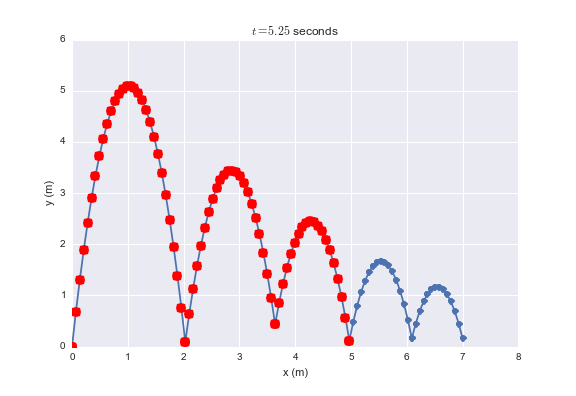
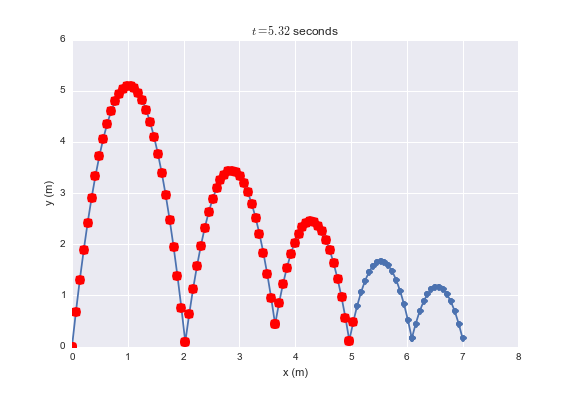
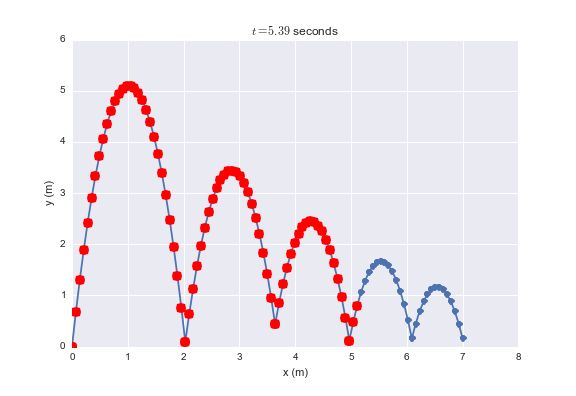
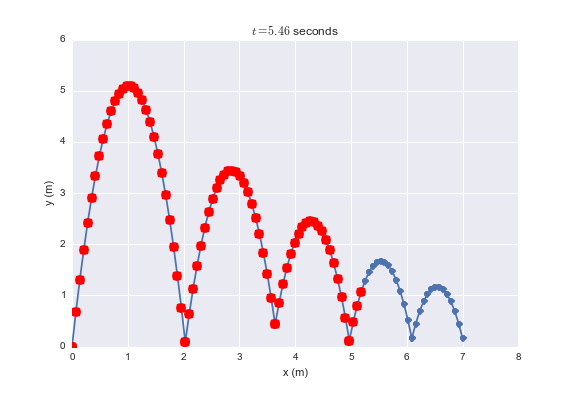
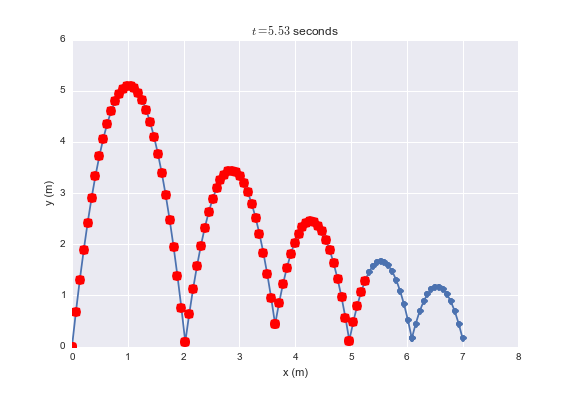
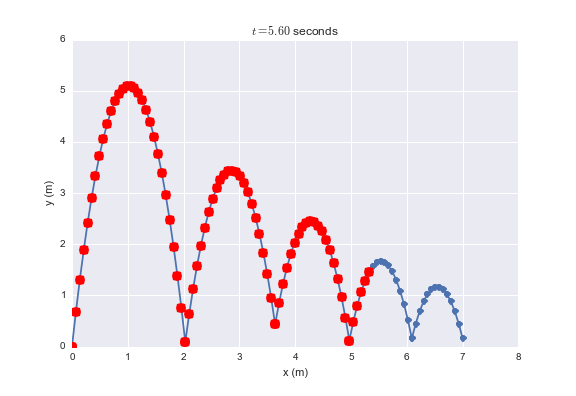
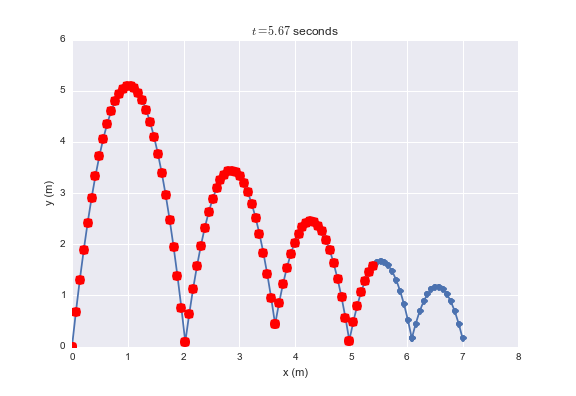
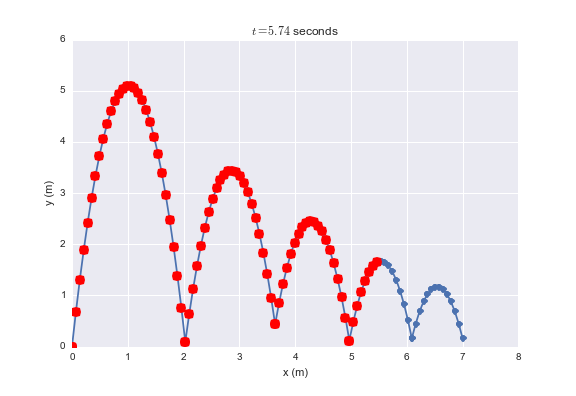
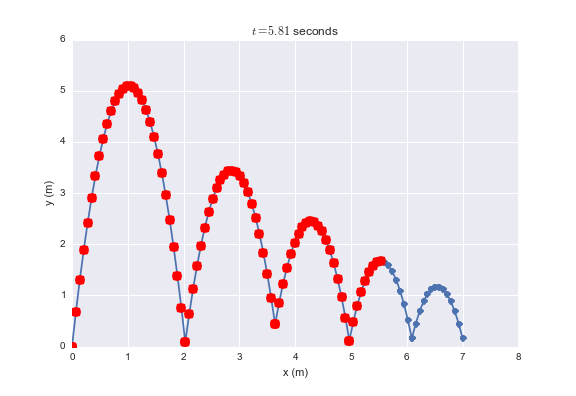
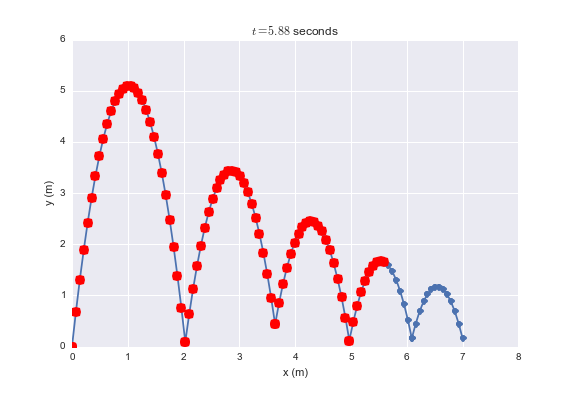
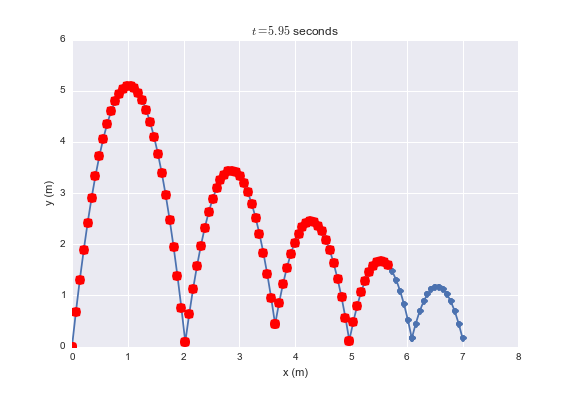
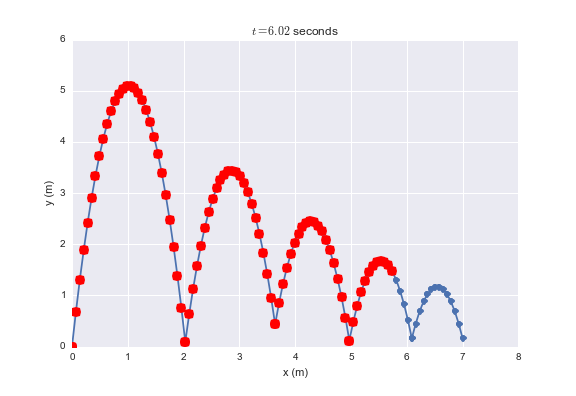
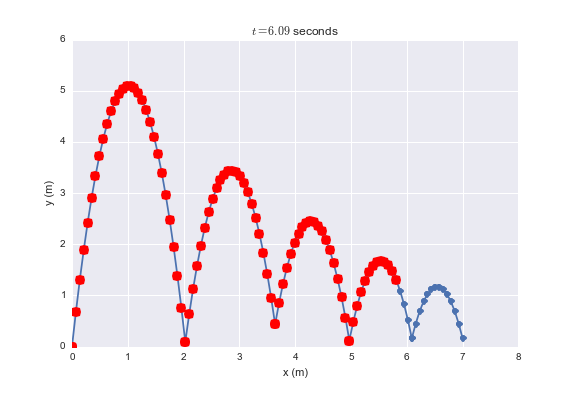
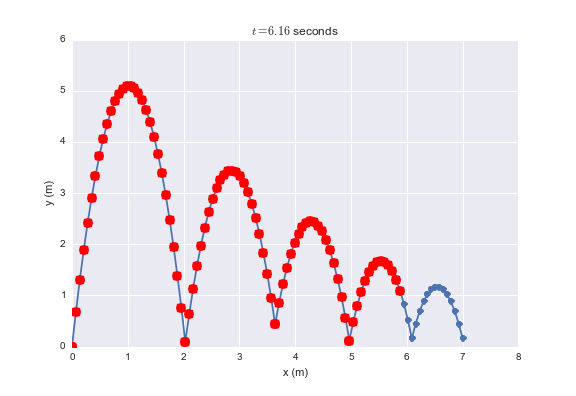
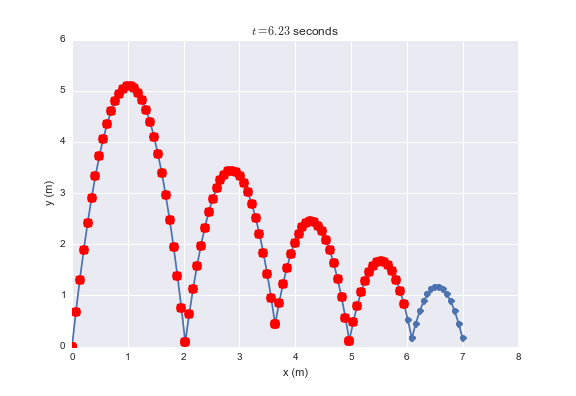
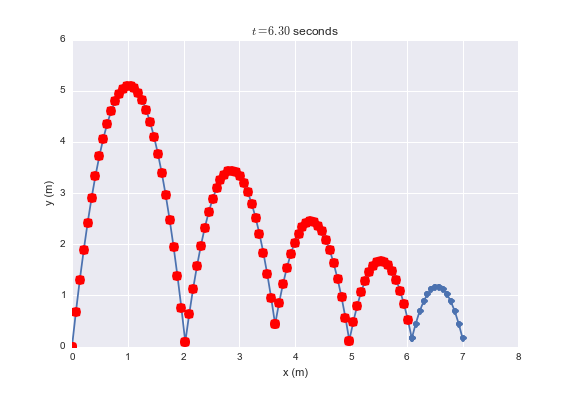
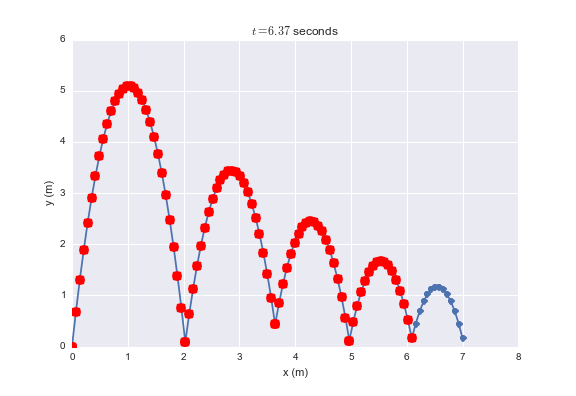
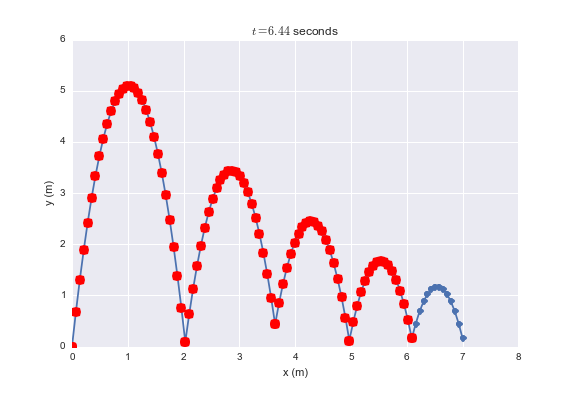
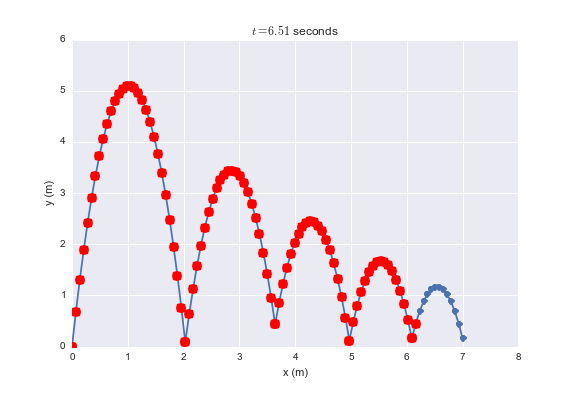
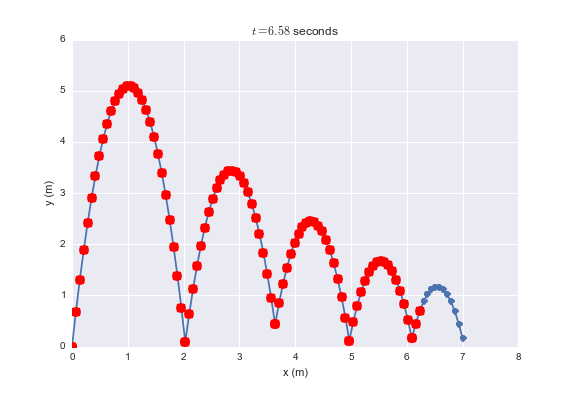
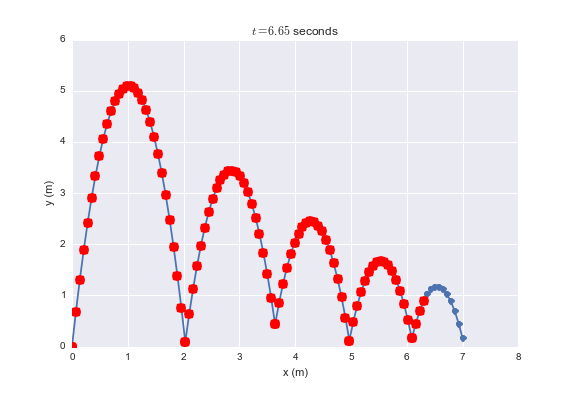
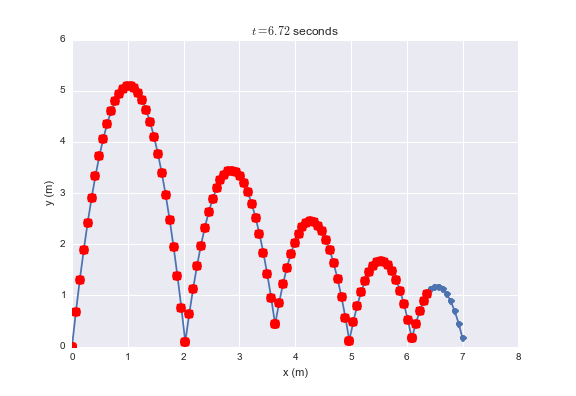
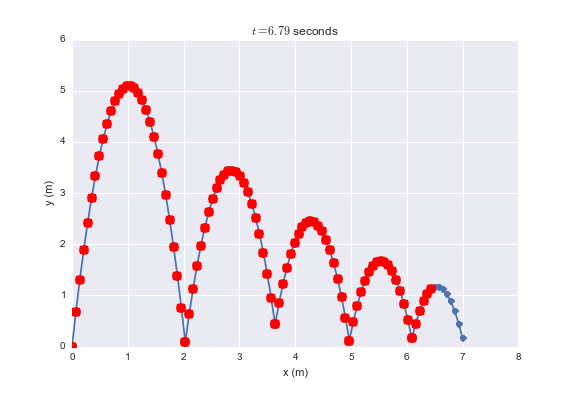
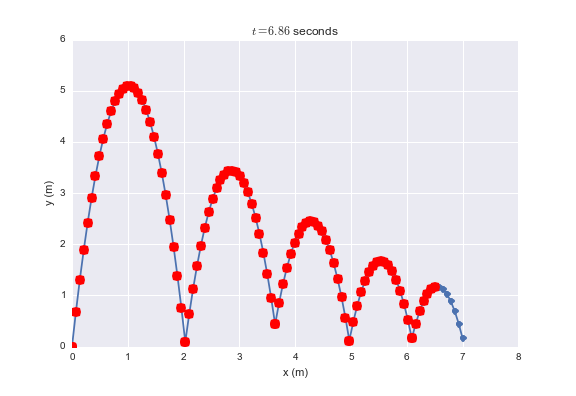
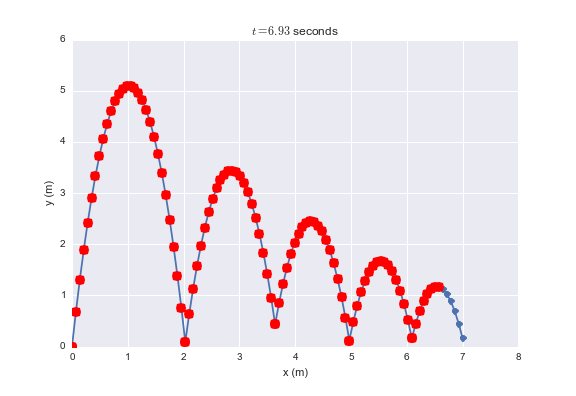

In [14]:
# general variables
number_of_bounces = 5
frames = 100
dt = 7. / frames


# configure axes
fig = plt.figure()
ax = plt.axes(xlim=(-4, 4), ylim=(-4, 4))
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')

# compute trajectory
t = np.linspace(0, 4.5, num=frames)
x_0 = np.array([0, 0])
v_0 = np.array([1, 10])

x = np.zeros((2, 1))
start_time = 0.
for i in range(number_of_bounces):
    bounce_time = compute_bounce_time(v_0[1], x_0[1])
    if bounce_time.size == 0:
        continue
    else:
        # we only keep the biggest bouncing time (in case there's a near zero one)
        bounce_time = np.max(bounce_time)

    t = np.arange(start_time, bounce_time, dt)
    x = np.hstack((x, 
                   1/2. * 9.81 * np.array([0, -1.])[:, np.newaxis] * t**2 + v_0[:, np.newaxis] * t + x_0[:, np.newaxis]))
    v1 = 9.81 * np.array([0, -1.])[:, np.newaxis] * t + v_0[:, np.newaxis] 
    v1_prime = compute_velocity_after_collision(v1[:, -1], 1.0, x[:, -1])
    v_0 = v1_prime
    x_0 = x[:, -1]

ax.set_xlim(0, 8)
ax.set_ylim(0, 6)

def init():
    ax.plot(x[0, :], x[1, :], '-o')
    ax.plot(x[0, 0], x[1, 0], 'or', ms=10)

def animate(i):
    ax.plot(x[0, i], x[1, i], 'or', ms=10)
    ax.set_title("$t = {:.2f}$ seconds".format(i * dt))
    return 

animation.FuncAnimation(fig, animate, init_func=init,
                        frames=frames, interval=100, blit=True)

# Conclusion 

I hope you've enjoyed this blog post that shows how to animate a bouncing ball according to the laws of physics.
I'm a bit sad that this post was not about explaining the physics of the bouncing, but rather just about computing trajectories.

Coming back to my original impulse (which was Lindy Hop), I'll now watch the previous animation and try to hop along to it. Happy bouncing!

This post was entirely written using the IPython notebook. Its content is BSD-licensed. You can see a static view or download this notebook with the help of nbviewer at [20151001_BouncingBalls.ipynb](http://nbviewer.ipython.org/urls/raw.github.com/flothesof/posts/master/20151001_BouncingBalls.ipynb).